<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Eduardo! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls= pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

#### Funciones generales
Creamos funciones para el procesamiento de los datos

In [3]:
#Verificar capacidad de conversión
def conversion_dato(DataFrame, ColumList, Type):
    #Parámetro Type 1 Entero 2 Categóricos, Object, String 3 Flotante
    #Con esta función verifica si tiene el formato correcto del que se especifique para las columnas especificada
    #Retorna True si esta cumple en su totalidad (formato correcto y sin valores ausentes)
    if Type == 1:
        Type_Name = "Entero"
    elif Type == 2:
        Type_Name = "Cadena"
    else:
        Type_Name = "Flotante"
        
    dir_result={'Conversion':Type_Name}
    for col in ColumList:
        if Type==1:
            try:
                bool = np.array_equal(DataFrame[col],DataFrame[col].astype(int))
            except:
                bool = False
            dir_result.update({col:bool})
        elif Type==2:
            try:
                bool = np.array_equal(DataFrame[col],DataFrame[col].astype("category"))
            except:
                bool = False
            dir_result.update({col:bool})
        elif Type==3:
            try:
                bool = np.array_equal(DataFrame[col],DataFrame[col].astype(float))
            except:
                bool = False
            dir_result.update({col:bool})
    return dir_result
        
#Valores ausentes
def columnas_ausentes(DataFrame):
    #Verifica la cantidad y la columnas que contienen valores ausentes de un DataFrame
    dir={}
    for col in DataFrame.columns.values:
        if DataFrame[col].isnull().sum() > 0:
            dir.update({col:int(DataFrame[col].isnull().sum())})
    return dir

#Tipo de datos columa
def tipo_dato_columnas(DataFrame,Columna):
    #Retorna el tipo de dato que es compatible todos los dtos de una columna sin contar valores nulos
    #Esta función no elimina datos nulos del dataframe de entrada
    list=[]
    df = DataFrame[Columna].dropna()
    try:
        d_int = np.array_equal(df,df.astype(int))
    except:
        d_int = False
    if d_int:
        list.append('Int')
        
    try:
        d_str = np.array_equal(df,df.astype("category"))
    except:
        d_str = False
    if d_str:
        list.append('Str')

    try:
        d_flt = np.array_equal(df,df.astype(float))
    except:
        d_flt = False
    if d_flt:
        list.append('Float')
    
    return {Columna:list}

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- Podemos notar que son las caracaterísticas de los planes que maneja la compañía, basandonos en la información no exiten valores ausentes y los tipos de datos son correctos, por el momento los costos son reconocidos como entero ante según el caso, por sentido común esta información será fija y no hay necesidad de unificar los tipos de dato las columnas de precio.

## Corregir datos

- Hasta el momento los tipos de datos son correctos

## Enriquecer los datos

- Hasta el momento los tipos de datos son correctos

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
df_users.sample(n=25)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
254,1254,Billy,Webb,49,"Detroit-Warren-Dearborn, MI MSA",2018-08-03,surf,NaN
86,1086,Adena,Macias,36,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-13,ultimate,NaN
357,1357,Ria,Beach,61,"Baton Rouge, LA MSA",2018-05-30,surf,NaN
274,1274,Dudley,Massey,53,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-06-10,ultimate,NaN
77,1077,Chau,Webster,23,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-01-14,ultimate,NaN
318,1318,Huey,Walsh,54,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-09-29,surf,NaN
368,1368,Enola,Ray,60,"Pittsburgh, PA MSA",2018-05-20,ultimate,NaN
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
442,1442,Terrell,Caldwell,66,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-25,ultimate,NaN
180,1180,Wonda,Hays,24,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-01,surf,2018-12-22


- Basandonos en la información, existen solo valores nulos en la columna ['churn_date'] de acuerdo al diccionario de datos significa que el plan está en uso, por lo cual podemos cambiar este valor evitando que sea marcado nulo.
- Son coherentes los tipos de datos en las columnas, en ['churn_date'] lo dejaremos en tipo object ya que una característica debe de ser sin fecha.


### Corregir los datos

In [8]:
#Por la cantidad de datos descartamos que pueda existir filas duplicadas
df_users.drop_duplicates(inplace=True)
#Ejecutamos un info para verificar si hubo modificacion
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 35.2+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
#Eliminar marcación de ausentes en columna churn_date
df_users['churn_date'] = df_users['churn_date'].fillna('asset')
#Revisamos un muestreo
df_users.sample(n=25)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
48,1048,Linwood,Terrell,42,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-08-24,surf,asset
427,1427,Zofia,Brock,64,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-01-26,ultimate,asset
238,1238,Jackeline,Byrd,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-16,surf,asset
481,1481,Roni,Frye,32,"Urban Honolulu, HI MSA",2018-12-27,surf,asset
90,1090,Brock,Skinner,30,"Indianapolis-Carmel-Anderson, IN MSA",2018-05-12,surf,asset
104,1104,Thurman,Stephens,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-12-23,ultimate,asset
52,1052,Edmond,Hopkins,47,"Houston-The Woodlands-Sugar Land, TX MSA",2018-03-05,surf,asset
74,1074,Particia,Fuller,69,"Knoxville, TN MSA",2018-11-26,ultimate,asset
274,1274,Dudley,Massey,53,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-06-10,ultimate,asset
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,asset


## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(n=25)

,id,user_id,call_date,duration
130322,1468_69,1468,2018-11-11,6.65
58803,1212_333,1212,2018-12-07,7.98
10037,1045_313,1045,2018-10-17,16.80
38960,1145_207,1145,2018-06-07,0.00
64258,1232_576,1232,2018-10-05,5.93
62111,1223_282,1223,2018-07-10,9.67
18416,1071_197,1071,2018-12-04,5.01
89429,1326_80,1326,2018-12-13,5.64
39292,1147_4,1147,2018-09-12,17.26
56261,1201_362,1201,2018-08-02,5.04


- No existen datos nulos, se puede cambiar el tipo de dato object a datatime de la columna ['call_date']

### Corregir los datos

In [12]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
#Por la cantidad de datos descartamos que pueda existir filas duplicadas
df_calls.drop_duplicates(inplace=True)
df_calls.info()
df_calls.sample(n=25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.3+ MB


,id,user_id,call_date,duration
76342,1270_440,1270,2018-12-30,0.52
1059,1007_80,1007,2018-08-09,10.52
22554,1082_628,1082,2018-12-24,5.26
54068,1195_238,1195,2018-12-17,8.94
55116,1197_73,1197,2018-12-04,19.84
33454,1126_114,1126,2018-07-10,0.00
37597,1141_666,1141,2018-10-11,4.39
124605,1440_121,1440,2018-10-06,9.82
38934,1145_181,1145,2018-08-25,5.80
8155,1039_95,1039,2018-08-28,8.23


### Enriquecer los datos

In [13]:
#Crear una nueva columna llamanda duration_round de tipo entero para redondear de acuerdo al contexto
df_calls['duration_round'] = np.ceil(df_calls['duration']).astype(int)
#Convertir a entero ['duration_round']
df_calls.sample(n=25)

,id,user_id,call_date,duration,duration_round
130525,1469_14,1469,2018-12-25,9.27,10
2402,1009_824,1009,2018-08-02,9.02,10
85673,1314_100,1314,2018-11-23,8.19,9
96195,1341_210,1341,2018-11-30,10.08,11
59505,1214_574,1214,2018-04-16,14.40,15
127177,1454_167,1454,2018-09-02,7.95,8
65835,1238_46,1238,2018-11-17,10.12,11
42054,1154_109,1154,2018-10-04,2.29,3
46346,1167_429,1167,2018-09-07,9.33,10
79017,1282_576,1282,2018-11-08,0.00,0


## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
df_messages.sample(n=25)


,id,user_id,message_date
29101,1178_85,1178,2018-11-06
32120,1199_309,1199,2018-09-23
75631,1491_565,1491,2018-08-23
28746,1174_536,1174,2018-10-22
39906,1258_385,1258,2018-11-25
69633,1453_81,1453,2018-12-15
71795,1467_127,1467,2018-11-18
20576,1130_251,1130,2018-10-27
44592,1298_48,1298,2018-12-31
23267,1141_36,1141,2018-09-16


- Se puede cambiar el tipo de dato de la columna ['message_date'] y no hay valores nulos

### Corregir los datos

In [16]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
#Por la cantidad de datos descartamos que pueda existir filas duplicadas
df_messages.drop_duplicates(inplace=True)
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.3+ MB


### Enriquecer los datos

- Hasta el momento están correctos

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(n=25)

,id,user_id,session_date,mb_used
88177,1406_494,1406,2018-09-03,397.28
66676,1311_455,1311,2018-12-30,379.64
52864,1238_98,1238,2018-12-04,0.00
7666,1041_506,1041,2018-11-10,35.82
29241,1133_336,1133,2018-10-18,96.34
81523,1382_69,1382,2018-12-12,841.47
45205,1201_64,1201,2018-11-06,763.71
11179,1055_184,1055,2018-10-22,263.48
69302,1324_15,1324,2018-09-06,511.94
90004,1415_108,1415,2018-07-19,806.49


- Se puede cambiar el tipo de dato de la columna ['session_date']

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
#Por la cantidad de datos descartamos que pueda existir filas duplicadas
df_messages.drop_duplicates(inplace=True)
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

- Crar una columna llamada mb_used_rund de tipo entero de acuerdo al contexto donde esté redondeado el número de gigas consumido

In [20]:
df_internet['gb_used_round'] = np.ceil(df_internet['mb_used']/1024).astype(int)
df_internet.sample(n=25)

,id,user_id,session_date,mb_used,gb_used_round
57708,1261_159,1261,2018-12-22,0.00,0
45318,1201_180,1201,2018-08-06,571.79,1
100348,1475_141,1475,2018-12-07,309.67,1
45527,1201_396,1201,2018-09-26,171.46,1
41582,1185_619,1185,2018-05-25,451.35,1
18832,1084_94,1084,2018-12-22,203.85,1
3904,1022_315,1022,2018-07-02,317.02,1
45981,1203_306,1203,2018-11-09,254.16,1
96819,1456_67,1456,2018-07-04,185.11,1
81613,1382_258,1382,2018-11-15,0.00,0


## Estudiar las condiciones de las tarifas

In [21]:
#Crear columna para redondear las llamdas de acuerdo a las tarifas
df_calls['duration_round'] = np.ceil(df_calls['duration']).astype(int)

df_calls.sample(n=25)

,id,user_id,call_date,duration,duration_round
71308,1254_158,1254,2018-12-15,7.87,8
124999,1440_515,1440,2018-10-28,3.42,4
115369,1404_163,1404,2018-09-19,10.94,11
47328,1171_359,1171,2018-06-09,6.18,7
17904,1068_230,1068,2018-07-27,0.00,0
55926,1201_24,1201,2018-10-29,10.67,11
101832,1362_591,1362,2018-06-16,7.72,8
91901,1329_1435,1329,2018-12-18,7.88,8
4684,1021_18,1021,2018-12-25,3.57,4
68382,1246_401,1246,2018-03-07,12.73,13


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [22]:
#Crear columna por mes de los dataframes a usar
df_calls['call_month']=df_calls['call_date'].dt.month
df_messages['message_month']=df_messages['message_date'].dt.month
df_internet['session_month']=df_internet['session_date'].dt.month

#Verificar las columnas creadas
print(df_calls.columns.values)
print(df_messages.columns.values)
print(df_internet.columns.values)

['id' 'user_id' 'call_date' 'duration' 'duration_round' 'call_month']
['id' 'user_id' 'message_date' 'message_month']
['id' 'user_id' 'session_date' 'mb_used' 'gb_used_round' 'session_month']


In [23]:
#Crear dataframe relacional, llamadas, usuarios
df_calls_1 = pd.merge(df_calls, df_users, on='user_id', how='left')
print(df_calls_1.columns.values)
df_calls_1.info()
print()
print()

#Crear dataframe relacional, mensajes, usuarios
df_messages_1 = pd.merge(df_messages, df_users, on='user_id', how='left')
print(df_messages_1.columns.values)
df_messages_1.info()
print()
print()

#Crear dataframe relacional, internet, usuarios
df_internet_1 = pd.merge(df_internet, df_users, on='user_id', how='left')
print(df_internet_1.columns.values)
df_internet_1.info()

['id' 'user_id' 'call_date' 'duration' 'duration_round' 'call_month'
 'first_name' 'last_name' 'age' 'city' 'reg_date' 'plan' 'churn_date']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              137735 non-null  object        
 1   user_id         137735 non-null  int64         
 2   call_date       137735 non-null  datetime64[ns]
 3   duration        137735 non-null  float64       
 4   duration_round  137735 non-null  int64         
 5   call_month      137735 non-null  int64         
 6   first_name      137735 non-null  object        
 7   last_name       137735 non-null  object        
 8   age             137735 non-null  int64         
 9   city            137735 non-null  object        
 10  reg_date        137735 non-null  object        
 11  plan            137735 non-null  object        
 12  ch

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls_2 = df_calls_1.groupby(['user_id','call_month'])['id'].count().reset_index()
df_calls_2.rename(columns={'id': 'num_calls'}, inplace=True)

#print(df_calls_2['call_month'].unique())
df_calls_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     2258 non-null   int64
 1   call_month  2258 non-null   int64
 2   num_calls   2258 non-null   int64
dtypes: int64(3)
memory usage: 53.0 KB


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_calls_3 = df_calls_1.groupby(['user_id','call_month'])['duration','duration_round'].sum().reset_index()

print(df_calls_3['call_month'].unique())
df_calls_3.info()
print(df_calls_3)

[12  8  9 10 11  5  6  7  3  4  1  2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2258 non-null   int64  
 1   call_month      2258 non-null   int64  
 2   duration        2258 non-null   float64
 3   duration_round  2258 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 70.7 KB
      user_id  call_month  duration  duration_round
0        1000          12    116.83             124
1        1001           8    171.14             182
2        1001           9    297.69             315
3        1001          10    374.11             393
4        1001          11    404.59             426
...       ...         ...       ...             ...
2253     1498          12    324.77             339
2254     1499           9    330.37             346
2255     1499          10    363.28             385
2256     1499  

In [26]:
#Se puede comprobar p.e. el user_id 1000 la columna duration_round con:

#df_test = df_calls_1.query("user_id==1000 and call_month==12")
#print(df_test)
#print(df_test['duration_round'].sum())

In [27]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_messages_2 = df_messages_1.groupby(['user_id','message_month'])['id'].count().reset_index()

#print(df_messages['message_month'].unique())
df_messages_2.info()
print(df_messages_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   user_id        1806 non-null   int64
 1   message_month  1806 non-null   int64
 2   id             1806 non-null   int64
dtypes: int64(3)
memory usage: 42.5 KB
      user_id  message_month  id
0        1000             12  11
1        1001              8  30
2        1001              9  44
3        1001             10  53
4        1001             11  36
...       ...            ...  ..
1801     1496              9  21
1802     1496             10  18
1803     1496             11  13
1804     1496             12  11
1805     1497             12  50

[1806 rows x 3 columns]


In [28]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_internet_2 = df_internet_1.groupby(['user_id','session_month'])['mb_used','gb_used_round'].sum().reset_index()

#print(df_internet_2['session_month'].unique())
df_internet_2.info()
print(df_internet_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2277 non-null   int64  
 1   session_month  2277 non-null   int64  
 2   mb_used        2277 non-null   float64
 3   gb_used_round  2277 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 71.3 KB
      user_id  session_month   mb_used  gb_used_round
0        1000             12   1901.47              4
1        1001              8   6919.15             21
2        1001              9  13314.82             41
3        1001             10  22330.49             50
4        1001             11  18504.30             49
...       ...            ...       ...            ...
2272     1498             12  23137.69             56
2273     1499              9  12984.76             37
2274     1499             10  19492.43             52
2275     1499             11  16813.83 

In [29]:
#Se puede comprobar p.e. el user_id 1000 la columna gb_used_round con:

#df_test = df_internet_1.query("user_id==1000 and session_month==12")
#print(df_test)
#print(df_test['gb_used_round'].sum())

In [30]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

print(len(df_calls_2))
print(len(df_calls_3))
print(len(df_messages_2))
print(len(df_internet_2))

#print(df_calls_2['call_month'].unique())
#print(df_calls_3['call_month'].unique())
#print(df_messages_2['message_month'].unique())
#print(df_internet_2['session_month'].unique())

2258
2258
1806
2277


In [31]:
#Fusionar dataframes primero el de internet (es el que contiene más datos) con el de minutos de llamada
df_general = pd.merge(df_internet_2, df_calls_2, how='outer', left_on=['user_id','session_month'], right_on=['user_id','call_month'])
print(len(df_general))

#print(df_general['session_month'].unique())
#print(df_general['call_month'].unique())
df_general.info()
df_general.head()

print(df_general[df_general['session_month'].isnull()])

#Igualar los meses ausentes
df_general['session_month'] = df_general['session_month'].fillna(df_general['call_month'])
df_general['call_month'] = df_general['call_month'].fillna(df_general['session_month'])

#print(df_general['session_month'].unique())
#print(df_general['call_month'].unique())

2292
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2292 non-null   int64  
 1   session_month  2277 non-null   float64
 2   mb_used        2277 non-null   float64
 3   gb_used_round  2277 non-null   float64
 4   call_month     2258 non-null   float64
 5   num_calls      2258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 125.3 KB
      user_id  session_month  mb_used  gb_used_round  call_month  num_calls
2277     1044            NaN      NaN            NaN         8.0        1.0
2278     1222            NaN      NaN            NaN         6.0        2.0
2279     1340            NaN      NaN            NaN         8.0        8.0
2280     1340            NaN      NaN            NaN        10.0       70.0
2281     1393            NaN      NaN            NaN        10.0        9.0
2282     1470            NaN 

In [32]:
#Susutituir ausentes por el número 0
df_general.fillna(0,inplace=True)
#Eliminar columnas duplicadas e innecesarias y renombrar columnas
df_general.drop(columns=['call_month'],inplace=True)
df_general.rename(columns={'session_month': 'month'}, inplace=True)
#Cambiar el tipo de dato de la columna month y mb_used_round
df_general['month'] = df_general['month'].astype(int)

#print(df_general['month'].unique())
df_general.info()
df_general.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2292 non-null   int64  
 1   month          2292 non-null   int64  
 2   mb_used        2292 non-null   float64
 3   gb_used_round  2292 non-null   float64
 4   num_calls      2292 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 107.4 KB


,user_id,month,mb_used,gb_used_round,num_calls
0,1000,12,1901.47,4.0,16.0
1,1001,8,6919.15,21.0,27.0
2,1001,9,13314.82,41.0,49.0
3,1001,10,22330.49,50.0,65.0
4,1001,11,18504.30,49.0,64.0


In [33]:
#Fusionar dataframes general con duracion de llamadas
df_general = pd.merge(df_general, df_calls_3, how='outer', left_on=['user_id','month'], right_on=['user_id','call_month'])
print(len(df_general))

#print(df_general['month'].unique())
df_general.info()
df_general.head()

2292
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2292 non-null   int64  
 1   month           2292 non-null   int64  
 2   mb_used         2292 non-null   float64
 3   gb_used_round   2292 non-null   float64
 4   num_calls       2292 non-null   float64
 5   call_month      2258 non-null   float64
 6   duration        2258 non-null   float64
 7   duration_round  2258 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 161.2 KB


,user_id,month,mb_used,gb_used_round,num_calls,call_month,duration,duration_round
0,1000,12,1901.47,4.0,16.0,12.0,116.83,124.0
1,1001,8,6919.15,21.0,27.0,8.0,171.14,182.0
2,1001,9,13314.82,41.0,49.0,9.0,297.69,315.0
3,1001,10,22330.49,50.0,65.0,10.0,374.11,393.0
4,1001,11,18504.30,49.0,64.0,11.0,404.59,426.0


In [34]:
#Susutituir ausentes por el número 0
#df_general.fillna(0,inplace=True)
#Eliminar columnas duplicadas e innecesarias y renombrar columnas
df_general.drop(columns=['call_month'],inplace=True)
#Cambiar el tipo de dato de la columna mes 
df_general['month'] = df_general['month'].astype(int)
df_general['num_calls'] = df_general['num_calls'].astype(int)

#print(df_general['month'].unique())
df_general.info()
df_general.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2292 non-null   int64  
 1   month           2292 non-null   int64  
 2   mb_used         2292 non-null   float64
 3   gb_used_round   2292 non-null   float64
 4   num_calls       2292 non-null   int64  
 5   duration        2258 non-null   float64
 6   duration_round  2258 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 143.2 KB


,user_id,month,mb_used,gb_used_round,num_calls,duration,duration_round
0,1000,12,1901.47,4.0,16,116.83,124.0
1,1001,8,6919.15,21.0,27,171.14,182.0
2,1001,9,13314.82,41.0,49,297.69,315.0
3,1001,10,22330.49,50.0,65,374.11,393.0
4,1001,11,18504.30,49.0,64,404.59,426.0


In [35]:
#Fusionar dataframes general con mensajes
df_general = pd.merge(df_general, df_messages_2, how='outer', left_on=['user_id','month'], right_on=['user_id','message_month'])
print(len(df_general))

df_general['month'] = df_general['month'].fillna(df_general['message_month'])
df_general['message_month'] = df_general['message_month'].fillna(df_general['month'])

#print(df_general['month'].unique())
df_general.info()
df_general.head()

2293
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   float64
 2   mb_used         2292 non-null   float64
 3   gb_used_round   2292 non-null   float64
 4   num_calls       2292 non-null   float64
 5   duration        2258 non-null   float64
 6   duration_round  2258 non-null   float64
 7   message_month   2293 non-null   float64
 8   id              1806 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 179.1 KB


,user_id,month,mb_used,gb_used_round,num_calls,duration,duration_round,message_month,id
0,1000,12.0,1901.47,4.0,16.0,116.83,124.0,12.0,11.0
1,1001,8.0,6919.15,21.0,27.0,171.14,182.0,8.0,30.0
2,1001,9.0,13314.82,41.0,49.0,297.69,315.0,9.0,44.0
3,1001,10.0,22330.49,50.0,65.0,374.11,393.0,10.0,53.0
4,1001,11.0,18504.30,49.0,64.0,404.59,426.0,11.0,36.0


In [36]:
#Susutituir ausentes por el número 0
df_general.fillna(0,inplace=True)

#Eliminar columnas duplicadas e innecesarias y renombrar columnas
df_general.drop(columns=['message_month'],inplace=True)
df_general.rename(columns={'id': 'messages','duration': 'duration_call'}, inplace=True)
#Cambiar el tipo de dato de la columna mes
df_general['month'] = df_general['month'].astype(int)

df_general.info()
df_general.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   int64  
 2   mb_used         2293 non-null   float64
 3   gb_used_round   2293 non-null   float64
 4   num_calls       2293 non-null   float64
 5   duration_call   2293 non-null   float64
 6   duration_round  2293 non-null   float64
 7   messages        2293 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 161.2 KB


,user_id,month,mb_used,gb_used_round,num_calls,duration_call,duration_round,messages
0,1000,12,1901.47,4.0,16.0,116.83,124.0,11.0
1,1001,8,6919.15,21.0,27.0,171.14,182.0,30.0
2,1001,9,13314.82,41.0,49.0,297.69,315.0,44.0
3,1001,10,22330.49,50.0,65.0,374.11,393.0,53.0
4,1001,11,18504.30,49.0,64.0,404.59,426.0,36.0


In [37]:
#Corregir el tipo de datos a entero del dataframe final mb_used_round,num_calls,duration_round y menssages

df_general[['gb_used_round','num_calls','duration_round','messages']] = df_general[['gb_used_round','num_calls','duration_round','messages']].astype(int)

#print(df_general['month'].unique())
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   int64  
 2   mb_used         2293 non-null   float64
 3   gb_used_round   2293 non-null   int64  
 4   num_calls       2293 non-null   int64  
 5   duration_call   2293 non-null   float64
 6   duration_round  2293 non-null   int64  
 7   messages        2293 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 161.2 KB


In [38]:
# Añade la información de la tarifa

#Crear columna agregando el tipo de plan de cada user_id
df_general=pd.merge(df_general,df_users, on="user_id", how='left')

df_general.info()
df_general.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   int64  
 2   mb_used         2293 non-null   float64
 3   gb_used_round   2293 non-null   int64  
 4   num_calls       2293 non-null   int64  
 5   duration_call   2293 non-null   float64
 6   duration_round  2293 non-null   int64  
 7   messages        2293 non-null   int64  
 8   first_name      2293 non-null   object 
 9   last_name       2293 non-null   object 
 10  age             2293 non-null   int64  
 11  city            2293 non-null   object 
 12  reg_date        2293 non-null   object 
 13  plan            2293 non-null   object 
 14  churn_date      2293 non-null   object 
dtypes: float64(2), int64(7), object(6)
memory usage: 286.6+ KB


,user_id,month,mb_used,gb_used_round,num_calls,duration_call,duration_round,messages,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12,1901.47,4,16,116.83,124,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,asset
1,1001,8,6919.15,21,27,171.14,182,30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,asset
2,1001,9,13314.82,41,49,297.69,315,44,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,asset
3,1001,10,22330.49,50,65,374.11,393,53,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,asset
4,1001,11,18504.30,49,64,404.59,426,36,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,asset


In [39]:
#Eliminar columnas innecesarias
df_general.drop(columns=['first_name','last_name','reg_date'],inplace=True)
df_general.head()

,user_id,month,mb_used,gb_used_round,num_calls,duration_call,duration_round,messages,age,city,plan,churn_date
0,1000,12,1901.47,4,16,116.83,124,11,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,asset
1,1001,8,6919.15,21,27,171.14,182,30,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,asset
2,1001,9,13314.82,41,49,297.69,315,44,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,asset
3,1001,10,22330.49,50,65,374.11,393,53,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,asset
4,1001,11,18504.30,49,64,404.59,426,36,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,asset


In [40]:
# Calcula el ingreso mensual para cada usuario

#Crear función para calcular la tarifa de acuerdo al plan / plan-minutos-mensajes-gigas
def tarifa_month(duration_round,messages,gb_used_round,plan_name,total_flag):
    
    t_minutes = 0
    t_messages = 0
    t_gb = 0
    
    if plan_name == 'surf':
        t_tarifa = 20
        if duration_round>500:
            t_minutes = ((duration_round-500)*.03)
        if messages > 50:
            t_messages = ((messages-50)*.03)
        if gb_used_round > 15:
            t_gb = ((gb_used_round-15)*10)
            
    elif plan_name == 'ultimate':
        t_tarifa = 70
        if duration_round>3000:
            t_minutes = ((duration_round-3000)*.01)
        if messages > 1000:
            t_messages = ((messages-1000)*.01)
        if gb_used_round > 30:
            t_gb = ((gb_used_round-30)*7)
    
    if total_flag == 0:
        total = t_tarifa+t_minutes+t_messages+t_gb
    elif total_flag == 1:
        total = t_minutes
    elif total_flag == 2:
        total = t_messages
    elif total_flag == 3:
        total = t_gb
    
    return total

In [41]:
#Crear columna con la tarifa total mensual
df_general['total_tarifa_month'] = df_general.apply(lambda row: tarifa_month(row['duration_round'],row['messages'],row['gb_used_round'],row['plan'],0), axis=1)
df_general['minutes_tarifa_month'] = df_general.apply(lambda row: tarifa_month(row['duration_round'],row['messages'],row['gb_used_round'],row['plan'],1), axis=1)
df_general['messages_tarifa_month'] = df_general.apply(lambda row: tarifa_month(row['duration_round'],row['messages'],row['gb_used_round'],row['plan'],2), axis=1)
df_general['gigas_tarifa_month'] = df_general.apply(lambda row: tarifa_month(row['duration_round'],row['messages'],row['gb_used_round'],row['plan'],3), axis=1)

df_general.info()
df_general.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   mb_used                2293 non-null   float64
 3   gb_used_round          2293 non-null   int64  
 4   num_calls              2293 non-null   int64  
 5   duration_call          2293 non-null   float64
 6   duration_round         2293 non-null   int64  
 7   messages               2293 non-null   int64  
 8   age                    2293 non-null   int64  
 9   city                   2293 non-null   object 
 10  plan                   2293 non-null   object 
 11  churn_date             2293 non-null   object 
 12  total_tarifa_month     2293 non-null   float64
 13  minutes_tarifa_month   2293 non-null   float64
 14  messages_tarifa_month  2293 non-null   float64
 15  giga

,user_id,month,mb_used,gb_used_round,num_calls,duration_call,duration_round,messages,age,city,plan,churn_date,total_tarifa_month,minutes_tarifa_month,messages_tarifa_month,gigas_tarifa_month
0,1000,12,1901.47,4,16,116.83,124,11,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,asset,70.00,0.00,0.00,0
1,1001,8,6919.15,21,27,171.14,182,30,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,asset,80.00,0.00,0.00,60
2,1001,9,13314.82,41,49,297.69,315,44,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,asset,280.00,0.00,0.00,260
3,1001,10,22330.49,50,65,374.11,393,53,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,asset,370.09,0.00,0.09,350
4,1001,11,18504.30,49,64,404.59,426,36,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,asset,360.00,0.00,0.00,340
5,1001,12,19369.18,55,56,392.93,412,44,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,asset,420.00,0.00,0.00,400
6,1002,10,6552.01,15,11,54.13,59,15,36,"Las Vegas-Henderson-Paradise, NV MSA",surf,asset,20.00,0.00,0.00,0
7,1002,11,19345.08,45,55,359.76,386,32,36,"Las Vegas-Henderson-Paradise, NV MSA",surf,asset,320.00,0.00,0.00,300
8,1002,12,14396.24,37,47,363.24,384,41,36,"Las Vegas-Henderson-Paradise, NV MSA",surf,asset,240.00,0.00,0.00,220
9,1003,12,27044.14,53,149,1041.00,1104,50,52,"Tulsa, OK MSA",surf,asset,418.12,18.12,0.00,380


In [42]:
#imprimir los datos solicitados
df_general[['user_id', 'month', 'total_tarifa_month']].sort_values(by=['user_id','month'], ascending=[True,True]).head(25)

,user_id,month,total_tarifa_month
0,1000,12,70.00
1,1001,8,80.00
2,1001,9,280.00
3,1001,10,370.09
4,1001,11,360.00
5,1001,12,420.00
6,1002,10,20.00
7,1002,11,320.00
8,1002,12,240.00
9,1003,12,418.12


## Estudia el comportamiento de usuario

### Llamadas

In [43]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

#Crear la tabla
df_test_1 = df_general.groupby(['plan','month'])['duration_call'].mean().reset_index()


print(df_test_1)

        plan  month  duration_call
0       surf      1     192.840000
1       surf      2     280.851111
2       surf      3     310.970000
3       surf      4     332.380000
4       surf      5     377.053247
5       surf      6     407.208866
6       surf      7     424.523223
7       surf      8     387.169630
8       surf      9     390.992062
9       surf     10     405.692363
10      surf     11     399.599823
11      surf     12     447.475283
12  ultimate      1     183.162500
13  ultimate      2     379.861429
14  ultimate      3     285.701667
15  ultimate      4     316.508095
16  ultimate      5     383.664828
17  ultimate      6     349.811064
18  ultimate      7     403.767288
19  ultimate      8     397.274789
20  ultimate      9     413.287326
21  ultimate     10     425.168019
22  ultimate     11     420.477559
23  ultimate     12     433.012583


<AxesSubplot:xlabel='month', ylabel='duration_call'>

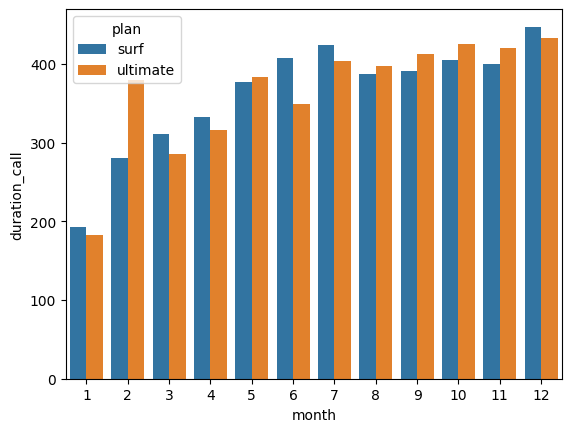

In [44]:
#GRÁFICO COMPARATIVO
sns.barplot(data=df_test_1, x="month", y="duration_call", hue="plan")

In [45]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

#GRAFICAR MINUTOS MENSUALES EN HISTOGRAMA
df_test_a = df_test_1.query("plan == 'surf'").reset_index()
df_test_b = df_test_1.query("plan == 'ultimate'").reset_index()

df_test_a.drop(columns=['index'],inplace=True)
df_test_b.drop(columns=['index'],inplace=True)

print(df_test_a)
print(df_test_b)

    plan  month  duration_call
0   surf      1     192.840000
1   surf      2     280.851111
2   surf      3     310.970000
3   surf      4     332.380000
4   surf      5     377.053247
5   surf      6     407.208866
6   surf      7     424.523223
7   surf      8     387.169630
8   surf      9     390.992062
9   surf     10     405.692363
10  surf     11     399.599823
11  surf     12     447.475283
        plan  month  duration_call
0   ultimate      1     183.162500
1   ultimate      2     379.861429
2   ultimate      3     285.701667
3   ultimate      4     316.508095
4   ultimate      5     383.664828
5   ultimate      6     349.811064
6   ultimate      7     403.767288
7   ultimate      8     397.274789
8   ultimate      9     413.287326
9   ultimate     10     425.168019
10  ultimate     11     420.477559
11  ultimate     12     433.012583


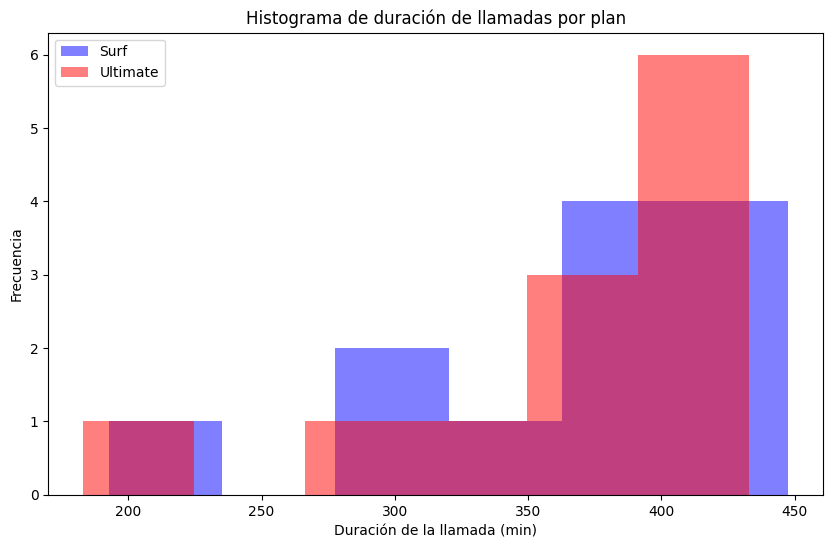

In [46]:
df_test_d = df_test_a[df_test_a["plan"] == "surf"]
df_test_e = df_test_b[df_test_b["plan"] == "ultimate"]

plt.figure(figsize=(10, 6))
plt.hist(df_test_d["duration_call"], bins=6, alpha=0.5, color='blue', label="Surf")
plt.hist(df_test_e["duration_call"], bins=6, alpha=0.5, color='red', label="Ultimate")

plt.title("Histograma de duración de llamadas por plan")
plt.xlabel("Duración de la llamada (min)")
plt.ylabel("Frecuencia")
plt.legend()

In [47]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print("Media mensual de llamadas",df_general['duration_call'].mean())
print("Varianza mensual de llamadas",np.var(df_general['duration_call']))

Media mensual de llamadas 405.2116266899259
Varianza mensual de llamadas 49878.43625112623


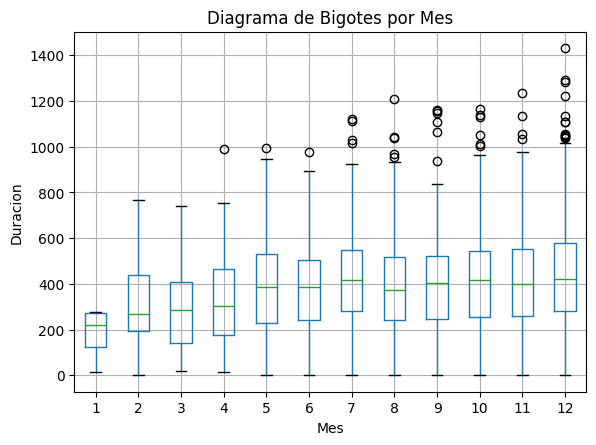

In [48]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

#DIAGRAMA DE BIGOTES
# Crear el diagrama de bigotes
df_general.boxplot(column='duration_call', by='month')

# Agregar etiquetas
plt.title('Diagrama de Bigotes por Mes')
plt.suptitle('')  # Eliminar el título por defecto
plt.xlabel('Mes')
plt.ylabel('Duracion')

# Mostrar el gráfico
plt.show()

- Existe dispersión atípica a partir del mes 4

### Mensajes

In [49]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

df_test_2 = df_general.groupby(['plan','month'])['messages'].sum().reset_index()
print(df_test_2)

        plan  month  messages
0       surf      1        21
1       surf      2       108
2       surf      3       351
3       surf      4       870
4       surf      5      1849
5       surf      6      2454
6       surf      7      3271
7       surf      8      4662
8       surf      9      5968
9       surf     10      8020
10      surf     11      9165
11      surf     12     12275
12  ultimate      1        62
13  ultimate      2       151
14  ultimate      3       243
15  ultimate      4       463
16  ultimate      5       931
17  ultimate      6      1379
18  ultimate      7      1937
19  ultimate      8      2732
20  ultimate      9      3259
21  ultimate     10      4181
22  ultimate     11      4903
23  ultimate     12      6796


<AxesSubplot:xlabel='month', ylabel='messages'>

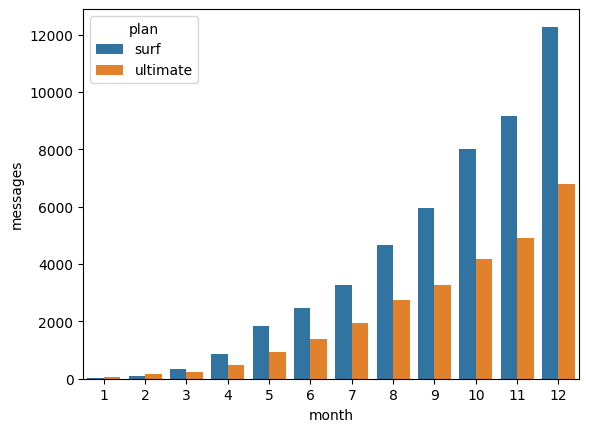

In [50]:
#GRÁFICO COMPARATIVO DE MENSAJES
sns.barplot(data=df_test_2, x="month", y="messages", hue="plan")

- En la cuestión de MENSAJES es más rentable en el plan SURF despúes de los primeros 2 meses del año y ambos aumentan proporcionalmente

In [51]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

df_test_3 = df_general.groupby(['plan','month'])['mb_used'].sum().reset_index()
print(df_test_3)

        plan  month     mb_used
0       surf      1     9749.72
1       surf      2   109609.59
2       surf      3   306945.12
3       surf      4   599210.15
4       surf      5  1073099.33
5       surf      6  1484248.33
6       surf      7  2030815.67
7       surf      8  2720843.68
8       surf      9  3218737.67
9       surf     10  4102786.41
10      surf     11  4624009.00
11      surf     12  5766125.26
12  ultimate      1    27672.37
13  ultimate      2   119901.66
14  ultimate      3   219858.22
15  ultimate      4   338554.75
16  ultimate      5   482109.99
17  ultimate      6   720882.29
18  ultimate      7   964339.92
19  ultimate      8  1264845.13
20  ultimate      9  1459408.78
21  ultimate     10  1866930.66
22  ultimate     11  2163278.04
23  ultimate     12  2766801.97


<AxesSubplot:xlabel='month', ylabel='mb_used'>

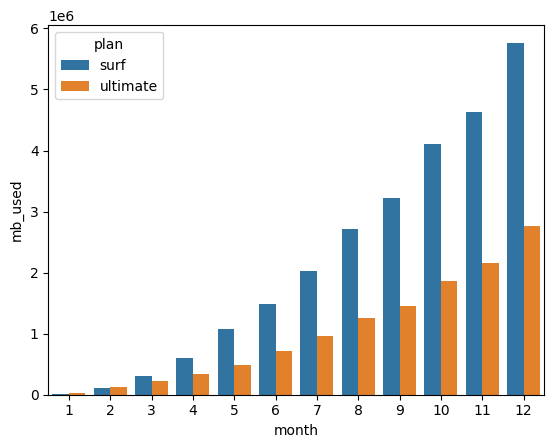

In [52]:
#GRÁFICO COMPARATIVO DE INTERNET
sns.barplot(data=df_test_3, x="month", y="mb_used", hue="plan")

- En la cuestión de consumo de megas es más rentable en el plan SURFT despúes de los primeros 3 meses del año y ambos aumentan proporcionalmente

### Internet

<AxesSubplot:xlabel='month', ylabel='gigas_tarifa_month'>

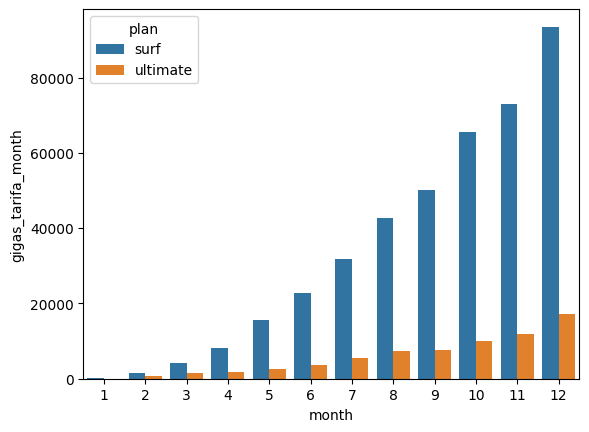

In [53]:
df_test_4 = df_general.groupby(['plan','month'])['gigas_tarifa_month'].sum().reset_index()
sns.barplot(data=df_test_4, x="month", y="gigas_tarifa_month", hue="plan")

## Ingreso

In [54]:
df_test_4 = df_general.groupby(['plan','month'])['total_tarifa_month'].sum().reset_index()
print(df_test_4)

        plan  month  total_tarifa_month
0       surf      1              100.00
1       surf      2             1689.57
2       surf      3             4756.65
3       surf      4             9095.53
4       surf      5            17387.37
5       surf      6            24869.80
6       surf      7            34513.56
7       surf      8            46246.85
8       surf      9            54374.67
9       surf     10            70804.83
10      surf     11            79175.21
11      surf     12           100757.14
12  ultimate      1              280.00
13  ultimate      2             1148.00
14  ultimate      3             2268.00
15  ultimate      4             3388.00
16  ultimate      5             4543.00
17  ultimate      6             6839.00
18  ultimate      7             9632.00
19  ultimate      8            12397.00
20  ultimate      9            13573.00
21  ultimate     10            17409.00
22  ultimate     11            20832.00
23  ultimate     12            27664.00


<AxesSubplot:xlabel='month', ylabel='total_tarifa_month'>

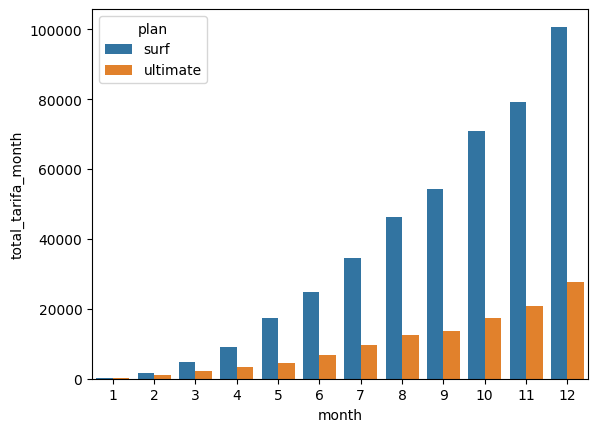

In [55]:
#GRÁFICO COMPARATIVO DE INTERNET
sns.barplot(data=df_test_4, x="month", y="total_tarifa_month", hue="plan")

- Visualizando el gráfico a simple vista el que genera más ingresos por mes es el plan SURFT

## Prueba las hipótesis estadísticas

- Son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.



- NULA: NO HAY CAMBIO, IGUALDAD, DIFERENCIA, LOS INGRESOS DE LOS PLANES LA LAL LA SON IGUALES

- ALTERNA: UNA VARIANTE: PROMEDIO DE LOS INGRESOS SON DIFERENTES

  PROBABILIDAD DE QUE PASE 0.05

In [56]:
media_surft = df_general.query("plan=='surf'")['total_tarifa_month']
media_utimate = df_general.query("plan=='ultimate'")['total_tarifa_month']
print(media_surft)
print(media_utimate)

1        80.00
2       280.00
3       370.09
4       360.00
5       420.00
         ...  
2287     22.85
2288     27.14
2289     25.85
2290     20.00
2291     20.00
Name: total_tarifa_month, Length: 1573, dtype: float64
0        70.0
19       70.0
20      294.0
26      196.0
27      252.0
        ...  
2243    168.0
2244    147.0
2245    112.0
2261     70.0
2292     70.0
Name: total_tarifa_month, Length: 720, dtype: float64


In [57]:
# Prueba las hipótesis
alpha = 0.05

results = st.ttest_ind(media_surft,media_utimate,equal_var=False)
print(results.pvalue)

if (results.pvalue<alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

2.3248333100716417e-97
Rechazamos la hipótesis nula


- El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

NULA: el ingreso promedio de los usuarios del área NY-NJ SON IGUALES

ALTERNA: el ingreso promedio de los usuarios del área NY-NJ es diferente

In [58]:
#print(df_general['city'].unique())
df_h_3 = df_general[df_general['city'].str.contains('NY-NJ', case=False, na=False)]
mean_ny_nj = df_h_3['total_tarifa_month']
#Promedio de NY-NJ
print(mean_ny_nj)

56       20.00
57       58.84
75       20.00
76      520.00
77      200.00
         ...  
2269    390.00
2270    400.00
2271    340.00
2272    430.00
2292     70.00
Name: total_tarifa_month, Length: 377, dtype: float64


In [59]:
df_h_4 = df_general[~df_general['city'].str.contains('NY-NJ', case=False, na=False)]
mean_regions = df_h_4['total_tarifa_month']
#Promedio de REGIONES DIFERENTES A NY-NJ
print(mean_regions)

0        70.00
1        80.00
2       280.00
3       370.09
4       360.00
         ...  
2287     22.85
2288     27.14
2289     25.85
2290     20.00
2291     20.00
Name: total_tarifa_month, Length: 1916, dtype: float64


In [60]:
# Prueba las hipótesis
alpha = 0.05

results = st.ttest_ind(mean_ny_nj,mean_regions,equal_var=False)
print(results.pvalue)

if (results.pvalue<alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

0.004632562058700149
Rechazamos la hipótesis nula


<AxesSubplot:xlabel='month', ylabel='total_tarifa_month'>

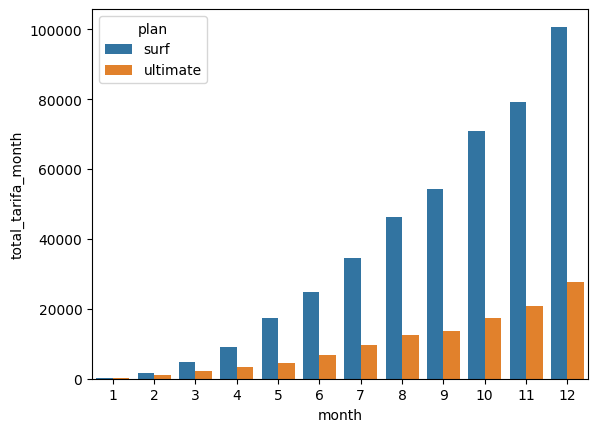

In [61]:
df_test_f = df_general.groupby(['plan','month'])['total_tarifa_month'].sum().reset_index()
sns.barplot(data=df_test_f, x="month", y="total_tarifa_month", hue="plan")

## Conclusión general

- 1 Con forme pasan los meses la utilidad aumente proporcionalmente
- 2 El plan surf genera más rentabilidad significativamente que el plan Ultimate
- 3 El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.
- 4 Son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf
- 5 Existe dispersiones significativas a partir del mes 7
- 6 El mayor rendimiento es de las regiones de NY-NJ en plan Surft
